In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 200000)

In [3]:
df1=pd.read_excel("laliga1819.xlsx")
df2=pd.read_excel("prem1819.xlsx")
df3=pd.read_excel("seriea1819.xlsx")
df4=pd.read_excel("league1819.xlsx")
df5=pd.read_excel("bundesliga1819.xlsx")

In [4]:
df1=df1[['Player', 'Mins', 'Rating']]
df2=df2[['Player', 'Mins', 'Rating']]
df3=df3[['Player', 'Mins', 'Rating']]
df4=df4[['Player', 'Mins', 'Rating']]
df5=df5[['Player', 'Mins', 'Rating']]

In [5]:
df1=pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [6]:
df1['Player']=df1['Player'].str.split(',').str[0]

In [7]:
df1['Player']=df1['Player'].replace(to_replace=['Nuernberg', 'Barcelona', 'Real Madrid', 'Celta Vigo', 'Valencia', 'Atletico Madrid', 'Sevilla', 'Deportivo Alaves', 'Athletic Bilbao', 'Eibar', 'Levante', 'Villarreal', 'Real Betis', 'Real Sociedad', 'Girona', 'Espanyol', 'Getafe', 'Celta Vigo', 'Rayo Vallecano', 'Leganes', 'SD Huesca', 'Real Valladolid', 'Valencia', 'Bayern Munich', 'Hoffenheim', 'RasenBallSport Leipzig', 'Eintracht Frankfurt', 'Borussia Dortmund', 'Borussia M.Gladbach', 'Borussia Dortmund', 'Hoffenheim', 'Bayer Leverkusen', 'Wolfsburg', 'Schalke', 'Hertha Berlin', 'Werder Bremen', 'Fortuna Duesseldorf', 'Ballsport Leipzig', 'Freiburg', 'VfB Stuttgart', 'Hannover', 'Mainz', 'Borussia M.Gladbach', 'Augsburg', 'Freiburg', 'Borussia Monchengladbach', 'VfL Wolfsburg', 'Nurnberg', 'Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Southampton','Torino', 'Inter', 'Sampdoria', 'Frosinone', 'Parma Calcio 1913', 'Atalanta', 'Empoli', ' 2013', 'Starbourg', 'Rasen', '04', '96', '05','Tottenham', 'Leicester', 'Watford', 'West Ham', 'Wolverhampton Wanderers', 'Juvetus', 'Napoli', 'Roma', 'Internazionale', 'Lazio', 'AC Milan', 'Atlanata', 'Fiorentina', 'Torion', 'Sampodoria', 'Sassuolo', 'Genoa', 'Chievo', 'Udinese', 'Bologna', 'Cagliari', 'SPAL', 'Paris Saint-Germain', 'Lille', 'Lyon', 'Saint-Etienne', 'Marseille', 'Montpellier', 'Nice', 'Reims', 'Nimes', 'Rennes', 'Starsbourg', 'Nantes', 'Angers', 'Bordeaux', 'Amiens', 'Toulouse', 'Monaco', 'Dijon', 'Caen', 'Guingamp'], value="", regex=True)

In [8]:
df1

Player  Mins  Rating
0                      Lionel Messi  2710    8.48
1                       Luis Suárez  2830    7.57
2                        Iago Aspas  2262    7.51
3                     Daniel Parejo  3063    7.40
4                     Karim Benzema  2964    7.38
5                 Antoine Griezmann  3204    7.29
6                   Ousmane Dembélé  1673    7.25
7                           Rodrigo  2743    7.24
8                 Wissam Ben Yedder  2821    7.23
9                 Guillermo Maripán  2009    7.20
10                     Gerard Piqué  3150    7.18
11                      Saúl Ñíguez  2925    7.17
12                      Raúl García  2379    7.17
13                    Pablo Sarabia  2730    7.16
14                         Casemiro  2316    7.15
15                      Joan Jordán  2879    7.14
16                     José Giménez  1772    7.13
17                     José Campaña  3213    7.10
18                    Santi Cazorla  2651    7.09
19                       Toni Kroos  2227    7.09
20                             Koke  2588    7.09
21                 Jonathan Calleri  2878    7.08
22                      Éver Banega  2681    7.08
23                     Ivan Rakitic  2643    7.06
24                    Rubén Rochina  1815    7.06
25                 Giovani Lo Celso  2401    7.06
26                             Cote  3035    7.06
27                    Enric Gallego  1541    7.05
28                   Zouhair Feddal  1702    7.04
29                       Rubén Peña  2674    7.04
30                   Vicente Iborra  1667    7.04
31                  Daniel Carvajal  2106    7.04
32                    Adnan Januzaj  1254    7.04
33                      Luka Modric  2618    7.03
34                 Cristhian Stuani  2731    7.03
35                   Sofiane Boufal  2100    7.03
36                  Roberto Rosales  1751    7.02
37                       Jordi Alba  2988    7.01
38                  Leandro Cabrera  2794    7.01
39                   Sergio Canales  2658    7.00
40                  Sergio Busquets  2720    7.00
41                   Iñaki Williams  3040    7.00
42                     Brais Méndez  2354    6.99
43                 Francis Coquelin  1767    6.99
44                      Diego Godín  2508    6.98
45                        José Gayá  3138    6.98
46                    Yeray Álvarez  2614    6.98
47                      Marc Bartra  2930    6.97
48                     Jorge Molina  2651    6.97
49                  Fabián Orellana  2739    6.97
50                      Filipe Luís  2038    6.96
51                       Maxi Gómez  2964    6.95
52               Geoffrey Kondogbia  1244    6.95
53                    Mario Hermoso  2806    6.95
54                    Raúl de Tomás  2821    6.94
55                 Dimitrios Siovas  2965    6.94
56                      André Silva  2164    6.93
57                    Thomas Partey  2067    6.93
58                  Aritz Elustondo  2253    6.93
59                      Jesús Navas  2714    6.93
60                 Gabriel Paulista  2625    6.93
61                     Júnior Firpo  1937    6.93
62                   Borja Iglesias  3082    6.93
63                Philippe Coutinho  2023    6.93
64                   Rodrigo Moreno  2534    6.93
65                   Ezequiel Garay  2137    6.92
66                     Sergio Ramos  2476    6.91
67                Youssef En-Nesyri  2106    6.91
68                   Guido Carrillo  1995    6.91
69                    Sergi Roberto  2089    6.91
70                   Santiago Arias  1771    6.91
71                        Marc Roca  3116    6.90
72                        Jan Oblak  3330    6.90
73                    Jorge Miramón  2496    6.90
74                  Óscar Rodríguez  2515    6.90
75                   Gonçalo Guedes  1474    6.89
76                             Jony  2985    6.89
77                    Rubén Alcaraz  2978    6.89
78                     Arturo Vidal  1929    6.89
79                 Vitorino A

In [9]:
df6=pd.read_excel("laligamarket19.xlsx")
df2=pd.read_excel("premmarket.xlsx")
df3=pd.read_excel("serieamarket.xlsx")
df4=pd.read_excel("leaguemarket.xlsx")
df5=pd.read_excel("bundesligamarket.xlsx")

In [10]:
df6=df6[['Player', 'Market value']]
df2=df2[['Player', 'Market value']]
df3=df3[['Player', 'Market value']]
df4=df4[['Player', 'Market value']]
df5=df5[['Player', 'Market value']]

In [11]:
df2=pd.concat([df2, df3, df4, df5, df6], ignore_index=True)

In [12]:
df2.columns=['Player', 'Market Value']
df2['Market Value']=df2['Market Value'].str.lstrip('£')
df2['Market Value']=df2['Market Value'].str.split('.').str[0]
df2['Market Value']=df2['Market Value'].str.split('k').str[0]
df2=df2.replace('?', '0')
df2=df2.replace('Free Transfer', '0')

In [13]:
df2=df2.dropna()
df2

Player Market Value
0                   Harry Kane          135
2                Mohamed Salah          135
4              Raheem Sterling          126
6              Kevin De Bruyne          117
8                   Sadio Mané          108
10                N'Golo Kanté           90
12             Virgil van Dijk           90
14           Christian Eriksen           90
16                  Leroy Sané           90
18                  Paul Pogba           90
20              Bernardo Silva           90
22                   Dele Alli           81
24             Roberto Firmino           72
26      Trent Alexander-Arnold           72
28             Marcus Rashford           72
30               Heung-min Son           72
32                     Alisson           72
34                       Rodri           72
36                Nicolas Pépé           67
38             Aymeric Laporte           67
40         Alexandre Lacazette           63
42               Gabriel Jesus           63
44                     Ederson           63
46   Pierre-Emerick Aubameyang           63
48               Harry Maguire           63
50             Tanguy Ndombélé           58
52               Sergio Agüero           58
54                    Jorginho           58
56                David de Gea           58
58                 John Stones           54
60           Christian Pulisic           54
62                        Kepa           54
64                Riyad Mahrez           54
66             Anthony Martial           54
68            Andrew Robertson           54
70                João Cancelo           49
72              Lucas Torreira           49
74               Wilfried Zaha           49
76            Davinson Sánchez           49
78            Giovani Lo Celso           45
80              Ilkay Gündogan           45
82         Georginio Wijnaldum           45
84                  Naby Keïta           45
86                 Declan Rice           45
88                 Richarlison           45
90                 Kyle Walker           45
92             Antonio Rüdiger           45
94                 Rúben Neves           45
96                     Fabinho           45
98            Mattéo Guendouzi           40
100             James Maddison           40
102              Dani Ceballos           40
104            Felipe Anderson           40
106           Sébastien Haller           40
108            Youri Tielemans           40
110               Granit Xhaka           36
112                 Moise Kean           36
114          Aaron Wan-Bissaka           36
116                Lucas Moura           36
118            Héctor Bellerín           36
120              Jesse Lingard           36
122                Harry Winks           36
124          Toby Alderweireld           36
126            Jordan Pickford           36
128                  Joe Gomez           31
130                  Issa Diop           31
132                    Willian           31
134            Victor Lindelöf           31
136             Ryan Sessegnon           31
138                 Diogo Jota           31
140          César Azpilicueta           31
142                  Joelinton           31
144           Jordan Henderson           31
146    Alex Oxlade-Chamberlain           31
148           Gylfi Sigurdsson           31
150                 Joel Matip           31
152               Raúl Jiménez           31
154                Mason Mount           31
156             Benjamin Mendy           31
158         Callum Hudson-Odoi           31
160               Ben Chilwell           31
162        Andreas Christensen           31
164              Mateo Kovacic           31
166                 Nathan Aké           31
168              Wilfred Ndidi           31
170              Tammy Abraham           28
172                 Alex Iwobi           28
174              Marcos Alonso           28
176                  Eric Dier           27
178                 Phil Foden           27
180        Oleksandr

In [14]:
df6=pd.read_excel("laligatrans18.xlsx")
df7=pd.read_excel("premtrans19.xlsx")
df3=pd.read_excel("serieatrans19.xlsx")
df4=pd.read_excel("leaguetrans18.xlsx")
df5=pd.read_excel("bundesligatrans18.xlsx")

In [15]:
df6.columns

Index(['In', 'Age', 'Nat.', 'Position', 'Market value', 'Left', 'Unnamed: 6',
       'Fee'],
      dtype='object')

In [16]:
df6=df6[['In', 'Market value', 'Fee']]
df7=df7[['In', 'Market value', 'Fee']]
df3=df3[['In', 'Market value', 'Fee']]
df4=df4[['In', 'Market value', 'Fee']]
df5=df5[['In', 'Market value', 'Fee']]

In [17]:
df3=pd.concat([df6, df7, df3, df4, df5], ignore_index=True)

In [18]:
df3.columns

Index(['In', 'Market value', 'Fee'], dtype='object')

In [19]:
#df3.columns=[['Player', 'Market Value', 'Fee']]
df3['Fee']=df3['Fee'].str.lstrip('£')
df3['Fee']=df3['Fee'].str.rstrip('m')
df3['Market value']=df3['Market value'].str.lstrip('£')
df3['Market value']=df3['Market value'].str.rstrip('m')
df3['Market value']=df3['Market value'].str.split('k').str[0]
df3['Fee']=df3['Fee'].str.split('k').str[0]
df3['Fee']=df3['Fee'].replace("?", '0')
df3['Fee']=df3['Fee'].replace("Free transfer", '0')

In [20]:
#df3.columns
df3.columns=['Player', 'Market Value', 'Fee']
df3.columns

Index(['Player', 'Market Value', 'Fee'], dtype='object')

In [21]:
df3.shape

(1305, 3)

In [22]:
df6=pd.read_excel("laligaout19.xlsx")
df7=pd.read_excel("premout19.xlsx")
df8=pd.read_excel("seriaout19.xlsx")
df4=pd.read_excel("leagueout19.xlsx")
df5=pd.read_excel("bundesligaout19.xlsx")

In [23]:
df6.columns

Index(['Out', 'Age', 'Nat.', 'Position', 'Market value', 'Joined',
       'Unnamed: 6', 'Fee'],
      dtype='object')

In [24]:
df6=df6[['Out']]
df7=df7[['Out']]
df8=df8[['Out']]
df4=df4[['Out']]
df5=df5[['Out']]

In [25]:
df4=pd.concat([df6, df7, df8, df4, df5], ignore_index=True)

In [26]:
df4.columns=['Player']

In [27]:
df4

Player
0                          Malcom
1                Jasper Cillessen
2                     André Gomes
3                    Paco Alcácer
4                    Denis Suárez
5                         Emerson
6                    Marc Cardona
7                  Marc Cucurella
8                  Sergi Palencia
9                Thomas Vermaelen
10                        Douglas
11                  Adrián Ortolá
12              Antoine Griezmann
13                Lucas Hernández
14                            NaN
15                          Rodri
16                 Gelson Martins
17                            NaN
18                 Luciano Vietto
19                            NaN
20                 Bernard Mensah
21                       Juanfran
22                    Filipe Luís
23                            NaN
24                  André Moreira
25                    Diego Godín
26                            NaN
27                  Mateo Kovacic
28                Marcos Llorente
29                 Theo Hernández
30                            NaN
31                  Raúl de Tomás
32                            NaN
33                   Keylor Navas
34                            NaN
35                    Lucas Silva
36                  Robert Ibáñez
37                 Gaku Shibasaki
38                          Chuli
39                Mathieu Flamini
40                           Neto
41                            NaN
42                    Simone Zaza
43                     Rúben Vezo
44                            NaN
45                Aymen Abdennour
46                      Nacho Gil
47                     Santi Mina
48                     Salva Ruiz
49                  Fran Villalba
50                  Álvaro Medrán
51              Wissam Ben Yedder
52                            NaN
53                  Pablo Sarabia
54                  Quincy Promes
55                            NaN
56                    Luis Muriel
57               Maximilian Wöber
58                      Yan Brice
59                            NaN
60                Gabriel Mercado
61                            NaN
62                   Sabin Merino
63                Ander Iturraspe
64                     Mikel Rico
65                   Xabi Etxeita
66                    Alex Remiro
67                 Markel Susaeta
68                         Juanmi
69                  Héctor Moreno
70                            NaN
71                  Eneko Capilla
72                 Borja Iglesias
73                  Mario Hermoso
74                   Aarón Martín
75                   Hernán Pérez
76                            NaN
77                        Roberto
78                 Álvaro Vázquez
79                   Óscar Duarte
80                            NaN
81                  Sergio García
82              Guillermo Maripán
83               Cristian Glauder
84                          Nando
85                 Carlos Vigaray
86                    Joan Jordán
87                     Rubén Peña
88                 Marc Cucurella
89                  Pablo Hervías
90                     Pere Milla
91                 Unai Elgezabal
92                   Asier Riesgo
93                   Rubén Lobato
94                        Luciano
95                  Gerard Gumbau
96                      Fede Vico
97                  Nabil El Zhar
98                            NaN
99                  Andrés Prieto
100                Ezequiel Muñoz
101                           NaN
102                     Pau López
103                  Júnior Firpo
104                           NaN
105                   Sergio León
106                Ryad Boudebouz
107                           NaN
108                  Takashi Inui
109                Darko Brasanac
110                    Alin Tosca
111                  Alex Alegría
112                 Pablo Fornals
113                Nicola Sansone
114                           NaN
115               Roberto Soriano
116                           NaN
117            

In [28]:
df1.columns

Index(['Player', 'Mins', 'Rating'], dtype='object')

In [29]:
df2.columns

Index(['Player', 'Market Value'], dtype='object')

In [30]:
df3.columns

Index(['Player', 'Market Value', 'Fee'], dtype='object')

In [31]:
df4.columns

Index(['Player'], dtype='object')

In [32]:
df5=pd.merge(df1, df3, on='Player', how='left')

In [33]:
df5

Player  Mins  Rating Market Value     Fee
0                      Lionel Messi  2710    8.48          NaN     NaN
1                       Luis Suárez  2830    7.57          NaN     NaN
2                        Iago Aspas  2262    7.51          NaN     NaN
3                     Daniel Parejo  3063    7.40          NaN     NaN
4                     Karim Benzema  2964    7.38          NaN     NaN
5                 Antoine Griezmann  3204    7.29          NaN     NaN
6                   Ousmane Dembélé  1673    7.25          NaN     NaN
7                           Rodrigo  2743    7.24          NaN     NaN
8                 Wissam Ben Yedder  2821    7.23          NaN     NaN
9                 Guillermo Maripán  2009    7.20          NaN     NaN
10                     Gerard Piqué  3150    7.18          NaN     NaN
11                      Saúl Ñíguez  2925    7.17          NaN     NaN
12                      Raúl García  2379    7.17          NaN     NaN
13                    Pablo Sarabia  2730    7.16          NaN     NaN
14                         Casemiro  2316    7.15          NaN     NaN
15                      Joan Jordán  2879    7.14          NaN     NaN
16                     José Giménez  1772    7.13          NaN     NaN
17                     José Campaña  3213    7.10          NaN     NaN
18                    Santi Cazorla  2651    7.09         2.25       0
19                       Toni Kroos  2227    7.09          NaN     NaN
20                             Koke  2588    7.09          NaN     NaN
21                 Jonathan Calleri  2878    7.08          NaN     NaN
22                      Éver Banega  2681    7.08          NaN     NaN
23                     Ivan Rakitic  2643    7.06          NaN     NaN
24                    Rubén Rochina  1815    7.06         1.35    1.26
25                 Giovani Lo Celso  2401    7.06          NaN     NaN
26                             Cote  3035    7.06          NaN     NaN
27                    Enric Gallego  1541    7.05          360    1.80
28                   Zouhair Feddal  1702    7.04          NaN     NaN
29                       Rubén Peña  2674    7.04          NaN     NaN
30                   Vicente Iborra  1667    7.04         8.10    9.00
31                  Daniel Carvajal  2106    7.04          NaN     NaN
32                    Adnan Januzaj  1254    7.04          NaN     NaN
33                      Luka Modric  2618    7.03          NaN     NaN
34                 Cristhian Stuani  2731    7.03          NaN     NaN
35                   Sofiane Boufal  2100    7.03          NaN     NaN
36                  Roberto Rosales  1751    7.02          NaN     NaN
37                       Jordi Alba  2988    7.01          NaN     NaN
38                  Leandro Cabrera  2794    7.01          540     540
39                   Sergio Canales  2658    7.00         4.50       0
40                  Sergio Busquets  2720    7.00          NaN     NaN
41                   Iñaki Williams  3040    7.00          NaN     NaN
42                     Brais Méndez  2354    6.99         3.15       -
43                 Francis Coquelin  1767    6.99          NaN     NaN
44                      Diego Godín  2508    6.98          NaN     NaN
45                        José Gayá  3138    6.98          NaN     NaN
46                    Yeray Álvarez  2614    6.98          NaN     NaN
47                      Marc Bartra  2930    6.97          NaN     NaN
48                     Jorge Molina  2651    6.97          NaN     NaN
49                  Fabián Orellana  2739    6.97         1.80    1.80
50                      Filipe Luís  2038    6.96          NaN     NaN
51                       Maxi Gómez  2964    6.95          NaN     NaN
52               Geoffrey Kondogbia  1244    6.95        27.00   19.80
53                    Mario Hermoso  2806    6.95          NaN     NaN
54                    Raúl de Tomás  2821    6.94         2.70       -
55                 Dimitrios Siovas  2965    6.94    

In [34]:
df6=pd.merge(df5['Player'], df4, on='Player', how='right')

In [35]:
df6['Class']='0'

In [36]:
df7=pd.merge(df5, df6, on='Player', how='left')

In [37]:
df7['Fee']=df7['Fee'].replace(to_replace=[np.NaN, 'Free transfer'], value="0", regex=True)

In [38]:
df7['Class']=df7['Class'].replace(to_replace=np.NaN, value="1", regex=True)

In [39]:
df7.loc[(df7['Class']=="1") & (df7['Rating']<6.5), 'Class']='2'

In [40]:
df7

Player  Mins  Rating Market Value     Fee Class
0                      Lionel Messi  2710    8.48          NaN       0     1
1                       Luis Suárez  2830    7.57          NaN       0     1
2                        Iago Aspas  2262    7.51          NaN       0     1
3                     Daniel Parejo  3063    7.40          NaN       0     1
4                     Karim Benzema  2964    7.38          NaN       0     1
5                 Antoine Griezmann  3204    7.29          NaN       0     0
6                   Ousmane Dembélé  1673    7.25          NaN       0     1
7                           Rodrigo  2743    7.24          NaN       0     1
8                 Wissam Ben Yedder  2821    7.23          NaN       0     0
9                 Guillermo Maripán  2009    7.20          NaN       0     0
10                     Gerard Piqué  3150    7.18          NaN       0     1
11                      Saúl Ñíguez  2925    7.17          NaN       0     1
12                      Raúl García  2379    7.17          NaN       0     1
13                    Pablo Sarabia  2730    7.16          NaN       0     0
14                         Casemiro  2316    7.15          NaN       0     1
15                      Joan Jordán  2879    7.14          NaN       0     0
16                     José Giménez  1772    7.13          NaN       0     1
17                     José Campaña  3213    7.10          NaN       0     1
18                    Santi Cazorla  2651    7.09         2.25       0     1
19                       Toni Kroos  2227    7.09          NaN       0     1
20                             Koke  2588    7.09          NaN       0     1
21                 Jonathan Calleri  2878    7.08          NaN       0     1
22                      Éver Banega  2681    7.08          NaN       0     1
23                     Ivan Rakitic  2643    7.06          NaN       0     1
24                    Rubén Rochina  1815    7.06         1.35    1.26     1
25                 Giovani Lo Celso  2401    7.06          NaN       0     0
26                             Cote  3035    7.06          NaN       0     1
27                    Enric Gallego  1541    7.05          360    1.80     1
28                   Zouhair Feddal  1702    7.04          NaN       0     1
29                       Rubén Peña  2674    7.04          NaN       0     0
30                   Vicente Iborra  1667    7.04         8.10    9.00     1
31                  Daniel Carvajal  2106    7.04          NaN       0     1
32                    Adnan Januzaj  1254    7.04          NaN       0     1
33                      Luka Modric  2618    7.03          NaN       0     1
34                 Cristhian Stuani  2731    7.03          NaN       0     1
35                   Sofiane Boufal  2100    7.03          NaN       0     1
36                  Roberto Rosales  1751    7.02          NaN       0     1
37                       Jordi Alba  2988    7.01          NaN       0     1
38                  Leandro Cabrera  2794    7.01          540     540     1
39                   Sergio Canales  2658    7.00         4.50       0     1
40                  Sergio Busquets  2720    7.00          NaN       0     1
41                   Iñaki Williams  3040    7.00          NaN       0     1
42                     Brais Méndez  2354    6.99         3.15       -     1
43                 Francis Coquelin  1767    6.99          NaN       0     1
44                      Diego Godín  2508    6.98          NaN       0     0
45                        José Gayá  3138    6.98          NaN       0     1
46                    Yeray Álvarez  2614    6.98          NaN       0     1
47                      Marc Bartra  2930    6.97          NaN       0     1
48                     Jorge Molina  2651    6.97          NaN       0     1
49                  Fabián Orellana  2739    6.97         1.80    1.80     1
50                      Filipe Luís  2038    6.96          NaN       0     0
51                       

In [41]:
df8=df7[df7['Market Value'].isnull()]

In [42]:
df8=df8[['Player', 'Mins', 'Rating', 'Fee', 'Class']]

In [43]:
df9=df7.dropna()

In [44]:
df10=pd.merge(df8, df2, on='Player', how='left')

In [45]:
df10

Player  Mins  Rating Fee Class Market Value
0                      Lionel Messi  2710    8.48   0     1          135
1                       Luis Suárez  2830    7.57   0     1           45
2                        Iago Aspas  2262    7.51   0     1           22
3                     Daniel Parejo  3063    7.40   0     1          NaN
4                     Karim Benzema  2964    7.38   0     1           36
5                 Antoine Griezmann  3204    7.29   0     0          117
6                   Ousmane Dembélé  1673    7.25   0     1           90
7                           Rodrigo  2743    7.24   0     1           45
8                 Wissam Ben Yedder  2821    7.23   0     0           36
9                 Guillermo Maripán  2009    7.20   0     0           13
10                     Gerard Piqué  3150    7.18   0     1           31
11                      Saúl Ñíguez  2925    7.17   0     1           81
12                      Raúl García  2379    7.17   0     1          NaN
13                    Pablo Sarabia  2730    7.16   0     0           36
14                         Casemiro  2316    7.15   0     1           54
15                      Joan Jordán  2879    7.14   0     0          NaN
16                     José Giménez  1772    7.13   0     1           63
17                     José Campaña  3213    7.10   0     1          NaN
18                       Toni Kroos  2227    7.09   0     1           54
19                             Koke  2588    7.09   0     1           63
20                 Jonathan Calleri  2878    7.08   0     1          NaN
21                      Éver Banega  2681    7.08   0     1          NaN
22                     Ivan Rakitic  2643    7.06   0     1           31
23                 Giovani Lo Celso  2401    7.06   0     0           45
24                             Cote  3035    7.06   0     1          NaN
25                   Zouhair Feddal  1702    7.04   0     1          NaN
26                       Rubén Peña  2674    7.04   0     0          NaN
27                  Daniel Carvajal  2106    7.04   0     1           45
28                    Adnan Januzaj  1254    7.04   0     1          NaN
29                      Luka Modric  2618    7.03   0     1           18
30                 Cristhian Stuani  2731    7.03   0     1          NaN
31                   Sofiane Boufal  2100    7.03   0     1          NaN
32                  Roberto Rosales  1751    7.02   0     1          NaN
33                       Jordi Alba  2988    7.01   0     1           45
34                  Sergio Busquets  2720    7.00   0     1           45
35                   Iñaki Williams  3040    7.00   0     1           45
36                 Francis Coquelin  1767    6.99   0     1           18
37                      Diego Godín  2508    6.98   0     0           18
38                        José Gayá  3138    6.98   0     1          NaN
39                    Yeray Álvarez  2614    6.98   0     1           22
40                      Marc Bartra  2930    6.97   0     1           19
41                     Jorge Molina  2651    6.97   0     1          NaN
42                      Filipe Luís  2038    6.96   0     0          NaN
43                       Maxi Gómez  2964    6.95   0     0           36
44                    Mario Hermoso  2806    6.95   0     0           22
45                 Dimitrios Siovas  2965    6.94   0     1          NaN
46                      André Silva  2164    6.93   0     1           19
47                    Thomas Partey  2067    6.93   0     1          NaN
48                  Aritz Elustondo  2253    6.93   0     1          NaN
49                      Jesús Navas  2714    6.93   0     1          NaN
50                 Gabriel Paulista  2625    6.93   0     1           18
51                     Júnior Firpo  1937    6.93   0     0           22
52                Philippe Coutinho  2023    6.93   0     1           81
53                   Rodrigo Moreno  2534    6.93   0     1          NaN
54            

In [46]:
df10=df10[['Player', 'Mins', 'Rating', 'Market Value', 'Fee', 'Class']]

In [47]:
df10

Player  Mins  Rating Market Value Fee Class
0                      Lionel Messi  2710    8.48          135   0     1
1                       Luis Suárez  2830    7.57           45   0     1
2                        Iago Aspas  2262    7.51           22   0     1
3                     Daniel Parejo  3063    7.40          NaN   0     1
4                     Karim Benzema  2964    7.38           36   0     1
5                 Antoine Griezmann  3204    7.29          117   0     0
6                   Ousmane Dembélé  1673    7.25           90   0     1
7                           Rodrigo  2743    7.24           45   0     1
8                 Wissam Ben Yedder  2821    7.23           36   0     0
9                 Guillermo Maripán  2009    7.20           13   0     0
10                     Gerard Piqué  3150    7.18           31   0     1
11                      Saúl Ñíguez  2925    7.17           81   0     1
12                      Raúl García  2379    7.17          NaN   0     1
13                    Pablo Sarabia  2730    7.16           36   0     0
14                         Casemiro  2316    7.15           54   0     1
15                      Joan Jordán  2879    7.14          NaN   0     0
16                     José Giménez  1772    7.13           63   0     1
17                     José Campaña  3213    7.10          NaN   0     1
18                       Toni Kroos  2227    7.09           54   0     1
19                             Koke  2588    7.09           63   0     1
20                 Jonathan Calleri  2878    7.08          NaN   0     1
21                      Éver Banega  2681    7.08          NaN   0     1
22                     Ivan Rakitic  2643    7.06           31   0     1
23                 Giovani Lo Celso  2401    7.06           45   0     0
24                             Cote  3035    7.06          NaN   0     1
25                   Zouhair Feddal  1702    7.04          NaN   0     1
26                       Rubén Peña  2674    7.04          NaN   0     0
27                  Daniel Carvajal  2106    7.04           45   0     1
28                    Adnan Januzaj  1254    7.04          NaN   0     1
29                      Luka Modric  2618    7.03           18   0     1
30                 Cristhian Stuani  2731    7.03          NaN   0     1
31                   Sofiane Boufal  2100    7.03          NaN   0     1
32                  Roberto Rosales  1751    7.02          NaN   0     1
33                       Jordi Alba  2988    7.01           45   0     1
34                  Sergio Busquets  2720    7.00           45   0     1
35                   Iñaki Williams  3040    7.00           45   0     1
36                 Francis Coquelin  1767    6.99           18   0     1
37                      Diego Godín  2508    6.98           18   0     0
38                        José Gayá  3138    6.98          NaN   0     1
39                    Yeray Álvarez  2614    6.98           22   0     1
40                      Marc Bartra  2930    6.97           19   0     1
41                     Jorge Molina  2651    6.97          NaN   0     1
42                      Filipe Luís  2038    6.96          NaN   0     0
43                       Maxi Gómez  2964    6.95           36   0     0
44                    Mario Hermoso  2806    6.95           22   0     0
45                 Dimitrios Siovas  2965    6.94          NaN   0     1
46                      André Silva  2164    6.93           19   0     1
47                    Thomas Partey  2067    6.93          NaN   0     1
48                  Aritz Elustondo  2253    6.93          NaN   0     1
49                      Jesús Navas  2714    6.93          NaN   0     1
50                 Gabriel Paulista  2625    6.93           18   0     1
51                     Júnior Firpo  1937    6.93           22   0     0
52                Philippe Coutinho  2023    6.93           81   0     1
53                   Rodrigo Moreno  2534    6.93          NaN   0     1
54            

In [48]:
df11=pd.concat([df9, df10])

In [49]:
df11

Player  Mins  Rating Market Value     Fee Class
18                    Santi Cazorla  2651    7.09         2.25       0     1
24                    Rubén Rochina  1815    7.06         1.35    1.26     1
27                    Enric Gallego  1541    7.05          360    1.80     1
30                   Vicente Iborra  1667    7.04         8.10    9.00     1
38                  Leandro Cabrera  2794    7.01          540     540     1
39                   Sergio Canales  2658    7.00         4.50       0     1
42                     Brais Méndez  2354    6.99         3.15       -     1
49                  Fabián Orellana  2739    6.97         1.80    1.80     1
52               Geoffrey Kondogbia  1244    6.95        27.00   19.80     1
54                    Raúl de Tomás  2821    6.94         2.70       -     0
62                   Borja Iglesias  3082    6.93          900       -     0
63                   Borja Iglesias  3082    6.93          900       -     0
64                   Borja Iglesias  3082    6.93          900    9.00     0
65                   Borja Iglesias  3082    6.93          900    9.00     0
70                Youssef En-Nesyri  2106    6.91         5.40    5.40     1
73                   Santiago Arias  1771    6.91        16.20    9.90     1
76                    Jorge Miramón  2496    6.90          450       0     1
77                  Óscar Rodríguez  2515    6.90          720       -     1
78                   Gonçalo Guedes  1474    6.89        36.00   36.00     1
80                    Rubén Alcaraz  2978    6.89          720     900     1
81                     Arturo Vidal  1929    6.89        31.50   16.20     1
82                 Vitorino Antunes  2182    6.89         3.15    2.25     1
86                     Mikel Merino  2061    6.88         9.00   10.80     1
87                     Mikel Merino  2061    6.88         9.00    6.30     1
88                       Jaime Mata  2437    6.88         1.80       0     1
89                     Ximo Navarro  2533    6.88         1.80    1.35     1
91                  Clément Lenglet  1935    6.88        22.50   32.31     1
94                     Okay Yokuslu  2205    6.87         6.75    5.40     1
99                     Thomas Lemar  1829    6.87        58.50   63.00     1
107                    Marc Muniesa  1403    6.83         2.25    4.50     1
108               Cristiano Piccini  1868    6.83         6.75    7.20     1
111                Karl Toko Ekambi  2149    6.83        16.20   16.20     1
121               Ramiro Funes Mori  2628    6.80         9.00    8.10     1
124                William Carvalho  2387    6.79        22.50   18.00     1
125                     David Juncà  1758    6.79         1.35       0     1
126                   Gerard Moreno  2317    6.79        18.00   18.00     1
128              Nemanja Maksimovic  3211    6.78         4.50    9.00     1
132                    Sergi Darder  2718    6.78         9.90    7.20     1
136                      Tomás Pina  2343    6.77         1.62    1.35     1
143                 Mauro Arambarri  2687    6.76         2.70    1.94     1
144                     David Soria  3330    6.76         3.60    2.70     1
155                     Daniel Wass  2356    6.74        13.50    5.40     1
168                Thibaut Courtois  2430    6.71        58.50   31.50     1
173                          Sidnei  1743    6.71         3.60    4.05     1
174                     Sergi Gómez  2766    6.70         7.20    4.05     1
186                     Manu García  2327    6.68         1.80       -     0
187                     Manu García  2327    6.68         1.80       -     0
194                     Dani García  2482    6.67         3.60       0     1
200                  Juan Hernández  2155    6.66          270       -     1
204                     Rubén Pérez  2473    6.66         6.75       0     1
210                Mouctar Diakhaby  1574    6.65         9.00   13.50     1
214                      

In [50]:
df11=df11.sort_index(axis=0)

In [51]:
df11

Player  Mins  Rating Market Value     Fee Class
0                      Lionel Messi  2710    8.48          135       0     1
1                       Luis Suárez  2830    7.57           45       0     1
2                        Iago Aspas  2262    7.51           22       0     1
3                     Daniel Parejo  3063    7.40          NaN       0     1
4                     Karim Benzema  2964    7.38           36       0     1
5                 Antoine Griezmann  3204    7.29          117       0     0
6                   Ousmane Dembélé  1673    7.25           90       0     1
7                           Rodrigo  2743    7.24           45       0     1
8                 Wissam Ben Yedder  2821    7.23           36       0     0
9                 Guillermo Maripán  2009    7.20           13       0     0
10                     Gerard Piqué  3150    7.18           31       0     1
11                      Saúl Ñíguez  2925    7.17           81       0     1
12                      Raúl García  2379    7.17          NaN       0     1
13                    Pablo Sarabia  2730    7.16           36       0     0
14                         Casemiro  2316    7.15           54       0     1
15                      Joan Jordán  2879    7.14          NaN       0     0
16                     José Giménez  1772    7.13           63       0     1
17                     José Campaña  3213    7.10          NaN       0     1
18                       Toni Kroos  2227    7.09           54       0     1
18                    Santi Cazorla  2651    7.09         2.25       0     1
19                             Koke  2588    7.09           63       0     1
20                 Jonathan Calleri  2878    7.08          NaN       0     1
21                      Éver Banega  2681    7.08          NaN       0     1
22                     Ivan Rakitic  2643    7.06           31       0     1
23                 Giovani Lo Celso  2401    7.06           45       0     0
24                             Cote  3035    7.06          NaN       0     1
24                    Rubén Rochina  1815    7.06         1.35    1.26     1
25                   Zouhair Feddal  1702    7.04          NaN       0     1
26                       Rubén Peña  2674    7.04          NaN       0     0
27                  Daniel Carvajal  2106    7.04           45       0     1
27                    Enric Gallego  1541    7.05          360    1.80     1
28                    Adnan Januzaj  1254    7.04          NaN       0     1
29                      Luka Modric  2618    7.03           18       0     1
30                   Vicente Iborra  1667    7.04         8.10    9.00     1
30                 Cristhian Stuani  2731    7.03          NaN       0     1
31                   Sofiane Boufal  2100    7.03          NaN       0     1
32                  Roberto Rosales  1751    7.02          NaN       0     1
33                       Jordi Alba  2988    7.01           45       0     1
34                  Sergio Busquets  2720    7.00           45       0     1
35                   Iñaki Williams  3040    7.00           45       0     1
36                 Francis Coquelin  1767    6.99           18       0     1
37                      Diego Godín  2508    6.98           18       0     0
38                        José Gayá  3138    6.98          NaN       0     1
38                  Leandro Cabrera  2794    7.01          540     540     1
39                    Yeray Álvarez  2614    6.98           22       0     1
39                   Sergio Canales  2658    7.00         4.50       0     1
40                      Marc Bartra  2930    6.97           19       0     1
41                     Jorge Molina  2651    6.97          NaN       0     1
42                      Filipe Luís  2038    6.96          NaN       0     0
42                     Brais Méndez  2354    6.99         3.15       -     1
43                       Maxi Gómez  2964    6.95           36       0     0
44                    Mar

In [52]:
df11['Fee']=df11['Fee'].replace(to_replace="-", value="0", regex=True)

In [53]:
df11['Market Value']=df11['Market Value'].replace(to_replace="-", value="0", regex=True)

In [54]:
conv={'Market Value': float, 'Class':int, 'Fee':float}

In [55]:
df11=df11.astype(conv)

In [56]:
from sklearn import linear_model

In [57]:
reg=linear_model.LinearRegression()

In [58]:
df12=df11.dropna(subset=['Market Value'])

In [59]:
x1=df12[['Mins', 'Rating']]
y1=df12[['Market Value']]

In [60]:
reg.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
df13=df11[df11['Market Value'].isnull()]

In [62]:
df13.columns

Index(['Player', 'Mins', 'Rating', 'Market Value', 'Fee', 'Class'], dtype='object')

In [63]:
df13=df13[['Player', 'Mins', 'Rating', 'Fee', 'Class']]

In [64]:
x2=df13[['Mins', 'Rating']]

In [65]:
y2=reg.predict(x2)

In [66]:
df13['Market Value']=y2

In [67]:
df12.columns

Index(['Player', 'Mins', 'Rating', 'Market Value', 'Fee', 'Class'], dtype='object')

In [68]:
df13=df13[['Player', 'Mins', 'Rating', 'Market Value', 'Fee', 'Class']]

In [69]:
df14=pd.concat([df12, df13], ignore_index=True)

In [70]:
df11=df14

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x=df11[['Mins', 'Rating', 'Market Value', 'Fee']]

In [73]:
y=df11[['Class']]

In [74]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [75]:
from sklearn.svm import SVC
model=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.01,
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
model.fit(x_train, y_train)

C:\Users\Debayan Das\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
model.score(x_test, y_test)

0.8135593220338984

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
model2=KNeighborsClassifier(n_neighbors=100, metric='hamming')

In [80]:
model2.fit(x_train, y_train)

C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [81]:
model2.score(x_test, y_test)

0.7728813559322034

In [82]:
df=df11[['Mins', 'Rating', 'Market Value', 'Fee', 'Class']]

In [83]:
df11.to_csv('stats1819.csv')

In [84]:
df.to_csv('stats1819(1).csv')

In [85]:
result_svm=df11
result_knn=df11

In [86]:
r, c=df11.shape

In [87]:
result_svm['Class Predicted']=model.predict(result_svm[['Mins', 'Rating', 'Market Value', 'Fee']])
                                            

In [88]:
a=[]
for i in range(1, r+1):
    a.append(i)

In [89]:
len(a)

1471

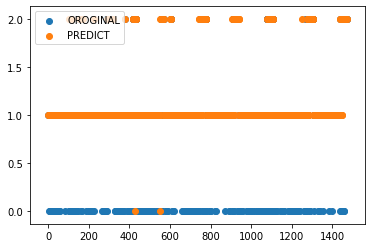

In [90]:
plt.scatter(a, result_svm['Class'])
plt.scatter(a, result_svm['Class Predicted'])
plt.legend(['OROGINAL', 'PREDICT'], )
plt.show()

In [91]:
result_knn['Class Predicted']=model.predict(result_knn[['Mins', 'Rating', 'Market Value', 'Fee']])
result_knn

Player  Mins  Rating  Market Value     Fee  \
0                      Lionel Messi  2710    8.48    135.000000    0.00   
1                       Luis Suárez  2830    7.57     45.000000    0.00   
2                        Iago Aspas  2262    7.51     22.000000    0.00   
3                     Karim Benzema  2964    7.38     36.000000    0.00   
4                 Antoine Griezmann  3204    7.29    117.000000    0.00   
5                   Ousmane Dembélé  1673    7.25     90.000000    0.00   
6                           Rodrigo  2743    7.24     45.000000    0.00   
7                 Wissam Ben Yedder  2821    7.23     36.000000    0.00   
8                 Guillermo Maripán  2009    7.20     13.000000    0.00   
9                      Gerard Piqué  3150    7.18     31.000000    0.00   
10                      Saúl Ñíguez  2925    7.17     81.000000    0.00   
11                    Pablo Sarabia  2730    7.16     36.000000    0.00   
12                         Casemiro  2316    7.15     54.000000    0.00   
13                     José Giménez  1772    7.13     63.000000    0.00   
14                       Toni Kroos  2227    7.09     54.000000    0.00   
15                    Santi Cazorla  2651    7.09      2.250000    0.00   
16                             Koke  2588    7.09     63.000000    0.00   
17                     Ivan Rakitic  2643    7.06     31.000000    0.00   
18                 Giovani Lo Celso  2401    7.06     45.000000    0.00   
19                    Rubén Rochina  1815    7.06      1.350000    1.26   
20                  Daniel Carvajal  2106    7.04     45.000000    0.00   
21                    Enric Gallego  1541    7.05    360.000000    1.80   
22                      Luka Modric  2618    7.03     18.000000    0.00   
23                   Vicente Iborra  1667    7.04      8.100000    9.00   
24                       Jordi Alba  2988    7.01     45.000000    0.00   
25                  Sergio Busquets  2720    7.00     45.000000    0.00   
26                   Iñaki Williams  3040    7.00     45.000000    0.00   
27                 Francis Coquelin  1767    6.99     18.000000    0.00   
28                      Diego Godín  2508    6.98     18.000000    0.00   
29                  Leandro Cabrera  2794    7.01    540.000000  540.00   
30                    Yeray Álvarez  2614    6.98     22.000000    0.00   
31                   Sergio Canales  2658    7.00      4.500000    0.00   
32                      Marc Bartra  2930    6.97     19.000000    0.00   
33                     Brais Méndez  2354    6.99      3.150000    0.00   
34                       Maxi Gómez  2964    6.95     36.000000    0.00   
35                    Mario Hermoso  2806    6.95     22.000000    0.00   
36                      André Silva  2164    6.93     19.000000    0.00   
37                  Fabián Orellana  2739    6.97      1.800000    1.80   
38                 Gabriel Paulista  2625    6.93     18.000000    0.00   
39                     Júnior Firpo  1937    6.93     22.000000    0.00   
40                Philippe Coutinho  2023    6.93     81.000000    0.00   
41               Geoffrey Kondogbia  1244    6.95     27.000000   19.80   
42                    Raúl de Tomás  2821    6.94      2.700000    0.00   
43                     Sergio Ramos  2476    6.91     22.000000    0.00   
44                    Sergi Roberto  2089    6.91     45.000000    0.00   
45                        Marc Roca  3116    6.90     27.000000    0.00   
46                        Jan Oblak  3330    6.90     90.000000    0.00   
47                   Borja Iglesias  3082    6.93    900.000000    0.00   
48                   Borja Iglesias  3082    6.93    900.000000    0.00   
49                   Borja Iglesias  3082    6.93    900.000000    9.00   
50                      Gareth Bale  1794    6.88     54.000000    0.00   
51                   Borja Iglesias  3082    6.93    900.000000    9.00   
52                            Nacho  3150    6.87     

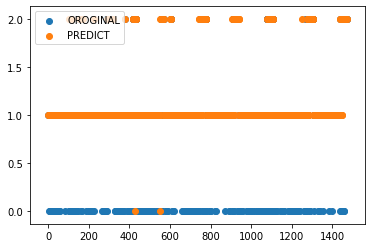

In [92]:
plt.scatter(a, result_knn['Class'])
plt.scatter(a, result_knn['Class Predicted'])
plt.legend(['OROGINAL', 'PREDICT'], )
plt.show()

In [93]:
arr1=[]
arr2=[]
for i in range (1, 200):
    arr1.append(i)
    model2=KNeighborsClassifier(n_neighbors=i, metric='hamming')
    model2.fit(x_train, y_train)
    arr2.append(model2.score(x_test, y_test))

C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.

C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Debayan Das\Anaconda3\lib\site-packages\ipykernel_launcher.

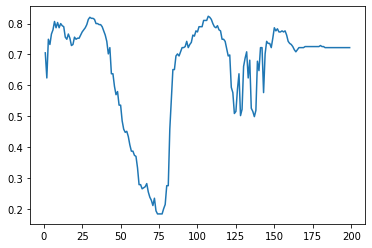

In [94]:
plt.plot(arr1, arr2)
plt.show()

In [95]:
min_exm=input("Enter playing time : ")
rating_exm=input("Enter rating : ")
market_exm=input("Enter market value : ")
buy_exm=input("Enter buyout clause : ")
x_exm=model.predict([[min_exm, rating_exm, market_exm, buy_exm]])
if x_exm[0]==0:
    print("\nThe player should be sold")
elif x_exm[0]==1:
    print("\nThe player should be retained")    
else:
    print("\nThe player should be given another chance")

Enter playing time : 0
Enter rating : 0
Enter market value : 0
Enter buyout clause : 0

The player should be given another chance


In [96]:
min_exm=input("Enter playing time : ")
rating_exm=input("Enter rating : ")
market_exm=input("Enter market value : ")
buy_exm=input("Enter buyout clause : ")
x_exm=model2.predict([[min_exm, rating_exm, market_exm, buy_exm]])
if x_exm[0]==0:
    print("\nThe player should be sold")
elif x_exm[0]==1:
    print("\nThe player should be retained")    
else:
    print("\nThe player should be given another chance")


Enter playing time : 0
Enter rating : 0
Enter market value : 0
Enter buyout clause : 0

The player should be retained


C:\Users\Debayan Das\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\Debayan Das\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
